In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/danielgrijalvas/movies' 

In [ ]:
pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
od.download(dataset_url)

In [ ]:
data_dir = './movies'

In [ ]:
os.listdir(data_dir)

In [2]:
movies_df=pd.read_csv('movies/movies.csv')

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
movies_df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(movies_df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

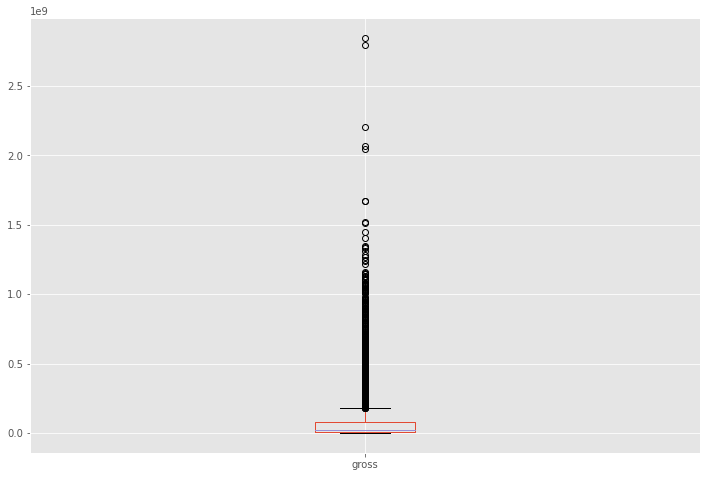

In [7]:
# Are there any Outliers?(An outlier is an observation that lies an abnormal distance
# from other values in a random sample from a population.)

movies_df.boxplot(column=['gross'])

In [8]:
# let's drop any duplicates present
movies_df.drop_duplicates()

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [9]:
# cleaning data as per requirement
for i in range(len(movies_df['released'])):
    if type(movies_df['released'][i])==str:
        movies_df['released'][i]=(movies_df['released'][i].split('(')[0])
    else:
        movies_df['released'][i]=movies_df['released'][i]

In [10]:
# changing data types of columns
# first we change the values of NaN and Null to 0 and then change the datatype to int
movies_df['votes']=movies_df['votes'].fillna(0)
movies_df['budget']=movies_df['budget'].fillna(0)
movies_df['gross']=movies_df['gross'].fillna(0)
movies_df['runtime']=movies_df['runtime'].fillna(0)

In [11]:
movies_df['votes']=movies_df['votes'].astype(int)
movies_df['budget']=movies_df['budget'].astype(int)
movies_df['gross']=movies_df['gross'].astype(int)
movies_df['runtime']=movies_df['runtime'].astype(int)

In [12]:
# Order our Data to get good insights

movies_df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens      PG-13     Action  2015   
7244                      Avengers: Infinity War      PG-13     Action  2018   
7480                               The Lion King         PG  Animation  2019   
6653                              Jurassic World      PG-13     Action  2015   
6043                                The Avengers      PG-13     Action  2012   
...                                          ...        ...        ...   ...   
5033                            Loving Annabelle  Not Rated      Drama  2006   
7667                                   Tee em el        NaN     Horror  2020   
3045                                     Titanic      PG-13      Drama  1997   
7445                           Avengers: Endgame      PG-13     Action  2019   
5445                                      Avatar      PG-13     Action  2009   

                released  score    votes          director  \
6663  December 18, 2015     7.8   876000       J.J. Abrams   
7244     April 27, 2018     8.4   897000     Anthony Russo   
7480      July 19, 2019     6.9   222000       Jon Favreau   
6653      June 12, 2015     7.0   593000   Colin Trevorrow   
6043        May 4, 2012     8.0  1300000       Joss Whedon   
...                  ...    ...      ...               ...   
5033       May 24, 2007     6.3    12000  Katherine Brooks   
7667    August 19, 2020     5.7        7      Pereko Mosia   
3045  December 19, 1997     7.8  1100000     James Cameron   
7445     April 26, 2019     8.4   903000     Anthony Russo   
5445  December 18, 2009     7.8  1100000     James Cameron   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   
...                  ...                ...            ...        ...   
5033    Katherine Brooks         Erin Kelly  United States    1000000   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
5445       James Cameron    Sam Worthington  United States  237000000   

           gross                company  runtime  
6663  2069521700              Lucasfilm      138  
7244  2048359754         Marvel Studios      149  
7480  1670727580   Walt Disney Pictures      118  
6653  1670516444     Universal Pictures      124  
6043  1518815515         Marvel Studios      143  
...          ...                    ...      ...  
5033           0      Big Easy Pictures       77  
7667           0            PK 65 Films      102  
3045 -2147483648  Twentieth Century Fox      194  
7445 -2147483648         Marvel Studios      181  
5445 -2147483648  Twentieth Century Fox      162  

[7668 rows x 15 columns]

In [13]:
# not restricted to limited rows
pd.set_option('display.max_rows',None)

In [14]:
# Assume: High Budget and gross correlation.


In [15]:
# setting negative gross values to 0 for better understanding of plot
for i in range(len(movies_df['gross'])):
    if movies_df['gross'][i]>0:
        movies_df['gross'][i]=movies_df['gross'][i]
    else:
        movies_df['gross'][i]=0

<function matplotlib.pyplot.show(close=None, block=None)>

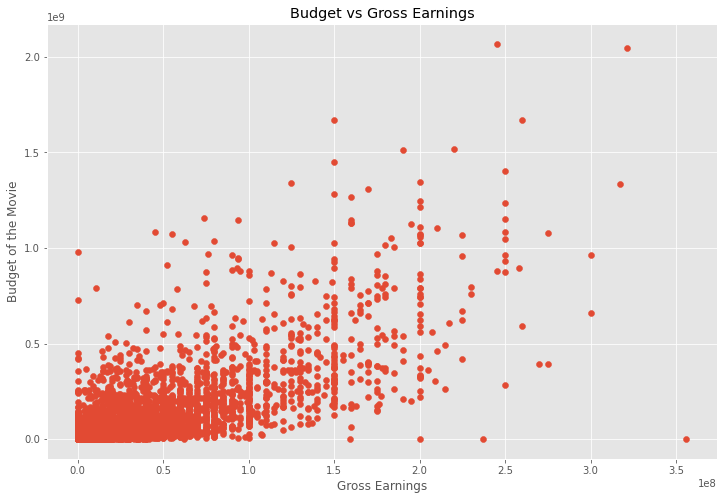

In [16]:
#scatter plot budget vs gross

plt.scatter(x=movies_df['budget'],y=movies_df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of the Movie')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

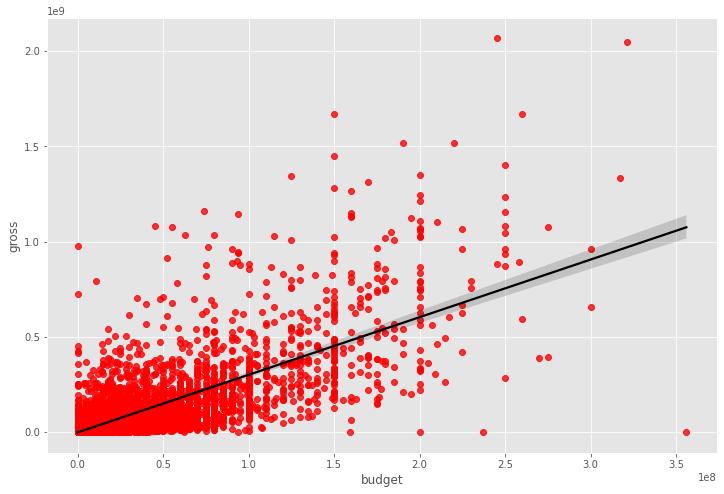

In [17]:
sns.regplot(x='budget', y='gross', data= movies_df, scatter_kws={'color':'red'}, line_kws={'color':'black'})

In [18]:
# Correlation Matrix between all numeric columns

movies_df.corr(method ='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.270113  0.116358
score    0.097995  1.000000  0.409182  0.055665  0.184929  0.398387
votes    0.222427  0.409182  1.000000  0.486931  0.627405  0.306984
budget   0.309212  0.055665  0.486931  1.000000  0.747117  0.268372
gross    0.270113  0.184929  0.627405  0.747117  1.000000  0.232144
runtime  0.116358  0.398387  0.306984  0.268372  0.232144  1.000000

In [19]:
movies_df.corr(method ='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.330410  0.209304  0.215960  0.096390
score    0.067652  1.000000  0.300115 -0.005194  0.089174  0.283966
votes    0.330410  0.300115  1.000000  0.439883  0.558922  0.197697
budget   0.209304 -0.005194  0.439883  1.000000  0.540352  0.176184
gross    0.215960  0.089174  0.558922  0.540352  1.000000  0.175893
runtime  0.096390  0.283966  0.197697  0.176184  0.175893  1.000000

In [20]:
movies_df.corr(method ='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.468107  0.291152  0.313743  0.141805
score    0.099045  1.000000  0.428138 -0.007500  0.130428  0.400394
votes    0.468107  0.428138  1.000000  0.604693  0.750279  0.289359
budget   0.291152 -0.007500  0.604693  1.000000  0.714503  0.246941
gross    0.313743  0.130428  0.750279  0.714503  1.000000  0.255205
runtime  0.141805  0.400394  0.289359  0.246941  0.255205  1.000000

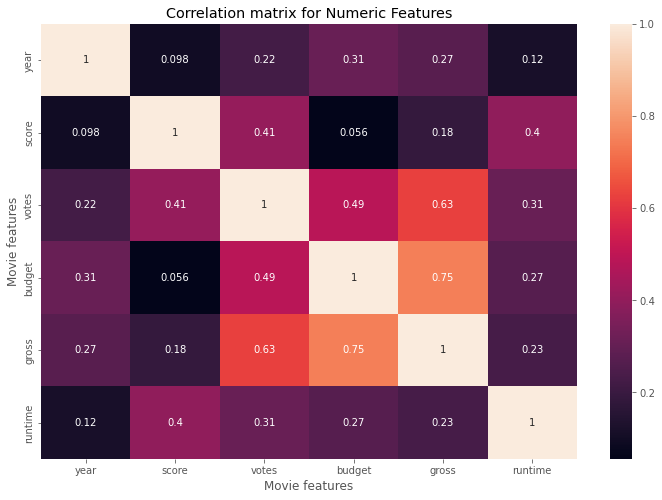

In [21]:
correlation_matrix = movies_df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
# Hence, we can see high correlation between Budget and Gross. As per our First assumption we were right.

In [23]:
# Using factorize - this assigns a random numeric value for each unique categorical value

movies_df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.143938  0.036367  0.965761  0.960206 -0.046733   
rating    0.143938  1.000000 -0.086723  0.156713  0.150081  0.012595   
genre     0.036367 -0.086723  1.000000  0.037184  0.036853 -0.002437   
year      0.965761  0.156713  0.037184  1.000000  0.993994 -0.044981   
released  0.960206  0.150081  0.036853  0.993994  1.000000 -0.045382   
score    -0.046733  0.012595 -0.002437 -0.044981 -0.045382  1.000000   
votes     0.290143  0.098171  0.021797  0.314745  0.304628 -0.012384   
director  0.745905  0.085520  0.047288  0.770497  0.769387 -0.022687   
writer    0.805211  0.103623  0.033688  0.824770  0.821186 -0.034685   
star      0.731565  0.093116  0.038649  0.756400  0.753962 -0.009896   
country   0.142828  0.000494 -0.015795  0.140216  0.146635  0.023097   
budget    0.275691  0.193229  0.069445  0.298022  0.289433 -0.011749   
gross     0.946360  0.157150  0.039069  0.979888  0.976904 -0.047072   
company   0.591667 -0.028035  0.009566  0.601571  0.604173 -0.028432   
runtime   0.052214  0.031798  0.000442  0.053816  0.048459  0.027432   

             votes  director    writer      star   country    budget  \
name      0.290143  0.745905  0.805211  0.731565  0.142828  0.275691   
rating    0.098171  0.085520  0.103623  0.093116  0.000494  0.193229   
genre     0.021797  0.047288  0.033688  0.038649 -0.015795  0.069445   
year      0.314745  0.770497  0.824770  0.756400  0.140216  0.298022   
released  0.304628  0.769387  0.821186  0.753962  0.146635  0.289433   
score    -0.012384 -0.022687 -0.034685 -0.009896  0.023097 -0.011749   
votes     1.000000  0.193607  0.226902  0.182881 -0.046388  0.395999   
director  0.193607  1.000000  0.748340  0.682385  0.155471  0.108033   
writer    0.226902  0.748340  1.000000  0.675685  0.157202  0.186680   
star      0.182881  0.682385  0.675685  1.000000  0.182045  0.110870   
country  -0.046388  0.155471  0.157202  0.182045  1.000000 -0.068884   
budget    0.395999  0.108033  0.186680  0.110870 -0.068884  1.000000   
gross     0.281526  0.750931  0.805629  0.735460  0.134382  0.279517   
company   0.009028  0.552258  0.546151  0.527116  0.226346 -0.087285   
runtime   0.109088 -0.007714  0.035108  0.039567  0.122260  0.117302   

             gross   company   runtime  
name      0.946360  0.591667  0.052214  
rating    0.157150 -0.028035  0.031798  
genre     0.039069  0.009566  0.000442  
year      0.979888  0.601571  0.053816  
released  0.976904  0.604173  0.048459  
score    -0.047072 -0.028432  0.027432  
votes     0.281526  0.009028  0.109088  
director  0.750931  0.552258 -0.007714  
writer    0.805629  0.546151  0.035108  
star      0.735460  0.527116  0.039567  
country   0.134382  0.226346  0.122260  
budget    0.279517 -0.087285  0.117302  
gross     1.000000  0.588008  0.037442  
company   0.588008  1.000000  0.005668  
runtime   0.037442  0.005668  1.000000

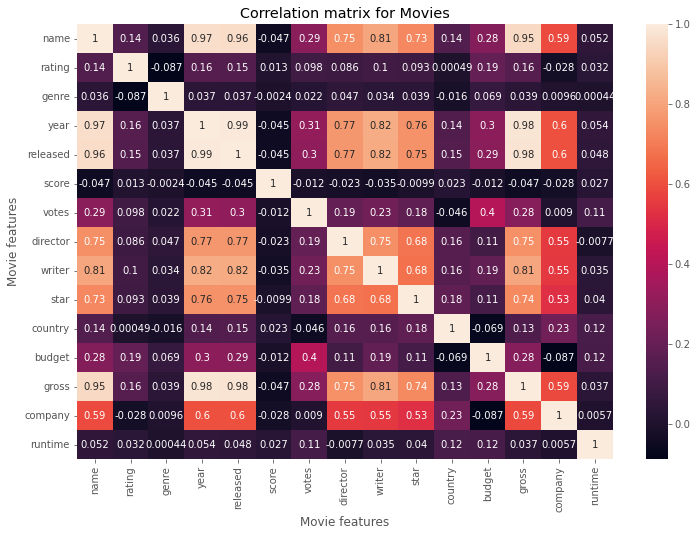

In [24]:
correlation_matrix = movies_df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
correlation_mat = movies_df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.143938
          genre       0.036367
          year        0.965761
          released    0.960206
          score      -0.046733
          votes       0.290143
          director    0.745905
          writer      0.805211
          star        0.731565
          country     0.142828
          budget      0.275691
          gross       0.946360
          company     0.591667
          runtime     0.052214
rating    name        0.143938
          rating      1.000000
          genre      -0.086723
          year        0.156713
          released    0.150081
          score       0.012595
          votes       0.098171
          director    0.085520
          writer      0.103623
          star        0.093116
          country     0.000494
          budget      0.193229
          gross       0.157150
          company    -0.028035
          runtime     0.031798
genre     name        0.036367
          rating     -0.086723
        

In [26]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    company    -0.087285
company   budget     -0.087285
genre     rating     -0.086723
rating    genre      -0.086723
budget    country    -0.068884
country   budget     -0.068884
gross     score      -0.047072
score     gross      -0.047072
          name       -0.046733
name      score      -0.046733
votes     country    -0.046388
country   votes      -0.046388
released  score      -0.045382
score     released   -0.045382
year      score      -0.044981
score     year       -0.044981
          writer     -0.034685
writer    score      -0.034685
score     company    -0.028432
company   score      -0.028432
rating    company    -0.028035
company   rating     -0.028035
director  score      -0.022687
score     director   -0.022687
country   genre      -0.015795
genre     country    -0.015795
votes     score      -0.012384
score     votes      -0.012384
budget    score      -0.011749
score     budget     -0.011749
star      score      -0.009896
score     star       -0.009896
director

In [27]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
director  company     0.552258
company   director    0.552258
gross     company     0.588008
company   gross       0.588008
          name        0.591667
name      company     0.591667
year      company     0.601571
company   year        0.601571
released  company     0.604173
company   released    0.604173
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
gross     star        0.735460
star      gross       0.735460
director  name        0.745905
name      director    0.745905
writer    director    0.748340
director  writer      0.748340
gross     director    0.750931
director  gross       0.750931
released  star        0.753962
star      released    0.753962
year      star        0.756400
star      year        0.756400
released

In [28]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = movies_df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Walt Disney Pictures         36327887792
Twentieth Century Fox        35208160390
New Line Cinema              19883797684
Marvel Studios               12268091083
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [29]:
movies_df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year              
"DIA" Productions GmbH & Co. KG                    2003  4.435093e+07
"Weathering With You" Film Partners                2019  1.934575e+08
.406 Production                                    1996  1.058000e+04
1+2 Seisaku Iinkai                                 2000  1.196218e+06
10 West Studios                                    2010  8.149060e+05
120 Films                                          2002  6.479328e+06
120dB Films                                        2009  2.667600e+04
                                                   2016  3.683720e+05
13 Productions                                     2000  2.546100e+04
1492 Pictures                                      1996  1.298324e+08
                                                   1999  8.742386e+07
1818 Productions                                   1983  1.223263e+07
19 Entertainment                                   2003  4.928883e+06
1978 Films                                         2017  4.065640e+07
1984 Private Defense Contractors                   2014  5.883438e+07
1992 Number Four Limited Partnership               1995  4.686937e+06
2 Loop Films                                       2002  2.643490e+05
2.0 Entertainment                                  2019  1.228104e+08
2.4.7. Films                                       2007  2.278398e+07
2003 Productions                                   2004  6.942439e+07
20th Century Studios                               2020  1.111055e+08
21 Laps Entertainment                              2014  4.129632e+07
                                                   2018  4.114238e+07
21st Century Film Corporation                      1989  3.953745e+06
                                                   1990  7.658401e+06
21st Century Films                                 1994  1.702394e+06
25th Hour Productions                              2002  2.393206e+07
26 Films                                           2009  2.045887e+07
2929 Productions                                   2007  7.248490e+06
                                                   2008  2.870518e+07
                                                   2014  5.092129e+06
2DUX²                                              2016  6.781500e+05
                                                   2018  1.977444e+08
3 Arts Entertainment                               1996  6.020933e+07
                                                   1997  7.581243e+07
                                                   2001  7.118650e+07
                                                   2010  6.496260e+05
                                                   2013  3.909596e+06
                                                   2014  1.614593e+08
                                                   2015  3.660674e+07
                                                   2019  2.238656e+07
3 Miles Apart Productions Ltd.                     1999  8.408835e+06
3311 Productions                                   2013  3.114953e+06
                                                   2017  5.042014e+06
360 Pictures                                       2007  9.669758e+06
391 Productions                                    1998  1.960216e+06
                                                   1999  9.244200e+04
3B Productions                                     1999  0.000000e+00
                                                   2003  1.679990e+05
3Mark Entertainment                                2001  4.760014e+06
4 1/2 Film                                         2006  1.297260e+06
4 Kids Entertainment                               1999  1.339493e+08
40 Acres & A Mule Filmworks                        1986  7.137502e+06
                                                   1989  3.729544e+07
                                                   1995  1.540344e+07
                                                   1999  3.457378e+07
    

In [30]:
df_numerized = movies_df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     6587       6      6  1980      1510    8.4   927000      2589    4014   
1     5573       6      1  1980      1311    5.8    65000      2269    1632   
2     5142       4      0  1980      1568    8.7  1200000      1111    2567   
3      286       4      4  1980      1311    7.7   221000      1301    2000   
4     1027       6      4  1980      1360    7.3   108000      1054     521   
5     2109       6     10  1980      2197    6.4   123000      2528    4362   
6     5574       6      0  1980      1568    7.9   188000      1412     838   
7     4436       6      3  1980       613    8.2   330000      1829    1769   
8     5281       4      0  1980      1552    6.8   101000      2306    1979   
9     6213       6      3  1980      2009    7.0    10000      2864     423   
10     463       4      0  1980       592    6.1    18000       357    3985   
11    5920       4      1  1980      2601    7.3    54000      1199    1832   
12    4315       4      1  1980       546    5.3    30000      2352    2333   
13    4084       6      6  1980      2786    7.7    49000      2388    2327   
14    1687       6      5  1980      1360    7.1    37000       318     520   
15    5024       4      6  1980      2630    7.2    27000      1243    3548   
16    1900       6      6  1980      2009    6.6    21000        49     735   
17      92       4      4  1980       613    6.9    29000       514    3262   
18    5865       6     10  1980       976    6.8    66000      1374    2104   
19    5189       6      4  1980       546    6.8    26000      2561     556   
20    1387       6      5  1980       830    6.5    20000      2891    4451   
21    2451       6      1  1980       132    6.8    14000      1892    2926   
22    5845       4      0  1980       243    6.7    22000       744    4192   
23    7445       4      8  1980       508    5.3    12000      2371    3528   
24    7127       4      6  1980      1695    6.4    14000      1153      12   
25     346       6     10  1980       676    6.9    33000      1583    3234   
26    3263       6      4  1980      1819    6.5     5100      2433    2483   
27    4442       4      0  1980       243    5.0     4100      1282      33   
28     980       6      5  1980      1568    7.2    17000      2673    4386   
29     362       6      5  1980       776    6.2    22000      2151    3326   
30    3796       4      4  1980      2858    7.1     8900      2811      83   
31    4373       6     10  1980      1291    5.4    16000      2143    4455   
32    4987       4      0  1980       297    5.3    15000      1041    1587   
33    1103       4      6  1980       132    6.1      604      1644     958   
34    4785       4      4  1980       613    6.7     9100      1225    3136   
35    4362       6      4  1980      2463    6.2    24000      1091    3107   
36    6008       6      4  1980      2154    6.3     4300       855    1358   
37    3721       6      4  1980      2583    6.0    11000      1598    3642   
38    6102       4      6  1980       613    5.9     4000      2296    3826   
39    1244       4      3  1980      1934    7.5    17000      1884    4201   
40    6748       4      7  1980      2696    6.3     5700      1403     518   
41     927       4      6  1980      1401    7.9    13000       335    2252   
42    6644       6      0  1980      1628    7.1     9000      2314    2543   
43    7305       6      3  1980       140    6.6    11000       186    1682   
44    5504       6     10  1980      2649    4.8     2000      1978     151   
45    1152       6      4  1980      1291    6.1    12000      2804    4298   
46    6094       6      0  1980      1510    5.3     3900      1934    3357   
47    5578       6     10  1980      2426    4.6     3900      2836    4344   
48    6360       4      0  1980      2197    5.1     3100       509    2893   
49    3253       4      3  1980      2010    8.3    1500

In [31]:
df_numerized.corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011223  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.015735 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029039  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000832  0.097995   
released -0.011223  0.015735  0.029039 -0.000832  1.000000  0.042918   
score     0.017097 -0.001314  0.027965  0.097995  0.042918  1.000000   
votes     0.013038  0.033743 -0.145296  0.222427  0.016892  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001275  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002421  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015597 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020063 -0.133348   
budget    0.020548 -0.081939 -0.334021  0.309212  0.010643  0.055665   
gross     0.011697 -0.099630 -0.241635  0.270113  0.009979  0.184929   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.009933  0.001030   
runtime   0.008483  0.064133 -0.052914  0.116358  0.005002  0.398387   

             votes  director    writer      star   country    budget  \
name      0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating    0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre    -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year      0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released  0.016892 -0.001275 -0.002421  0.015597 -0.020063  0.010643   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes     1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director  0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer    0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star     -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country   0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget    0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross     0.627405 -0.010192 -0.019745 -0.006731  0.097317  0.747117   
company   0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime   0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   

             gross   company   runtime  
name      0.011697  0.009211  0.008483  
rating   -0.099630 -0.032943  0.064133  
genre    -0.241635 -0.071067 -0.052914  
year      0.270113 -0.010431  0.116358  
released  0.009979 -0.009933  0.005002  
score     0.184929  0.001030  0.398387  
votes     0.627405  0.133457  0.306984  
director -0.010192  0.004404  0.017062  
writer   -0.019745  0.005646 -0.004036  
star     -0.006731  0.012442  0.009418  
country   0.097317  0.095548 -0.073319  
budget    0.747117  0.186474  0.268372  
gross     1.000000  0.159184  0.232144  
company   0.159184  1.000000  0.037537  
runtime   0.232144  0.037537  1.000000

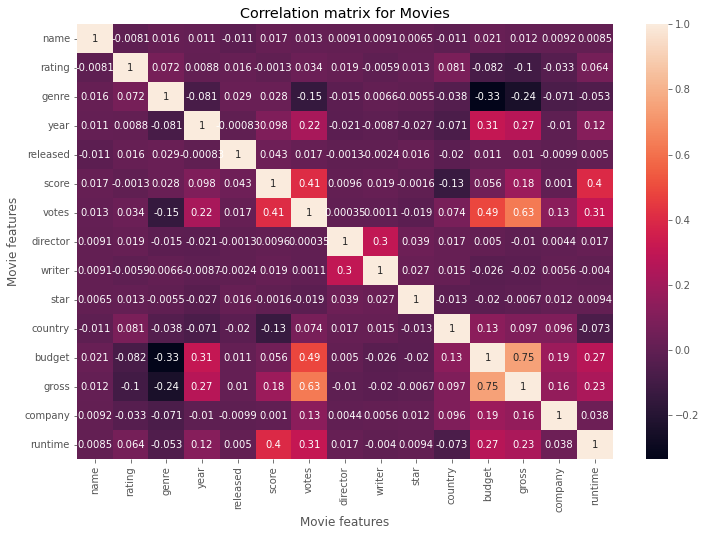

In [32]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [36]:
correlation_mat1 = df_numerized.corr()

corr_pairs1 = correlation_mat1.unstack()

print(corr_pairs1)

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011223
          score       0.017097
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.011697
          company     0.009211
          runtime     0.008483
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.015735
          score      -0.001314
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.099630
          company    -0.032943
          runtime     0.064133
genre     name        0.016355
          rating      0.072423
        

In [38]:
sorted_pairs1=corr_pairs1.sort_values()
sorted_pairs1

genre     budget     -0.334021
budget    genre      -0.334021
genre     gross      -0.241635
gross     genre      -0.241635
genre     votes      -0.145296
votes     genre      -0.145296
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.099630
gross     rating     -0.099630
budget    rating     -0.081939
rating    budget     -0.081939
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.073319
runtime   country    -0.073319
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052914
runtime   genre      -0.052914
genre     country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
star      year       -0.027242
year      star       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
year      director   -0.020795
director  year       -0.020795
country 

In [44]:
good_corr=sorted_pairs1[(sorted_pairs1)>0.5]

In [47]:
good_corr[(sorted_pairs1)!=1]

gross   votes     0.627405
votes   gross     0.627405
budget  gross     0.747117
gross   budget    0.747117
dtype: float64

In [48]:
# here we can clearly see that votes and budget have the highest correlation to gross earnings

<AxesSubplot:xlabel='rating', ylabel='gross'>

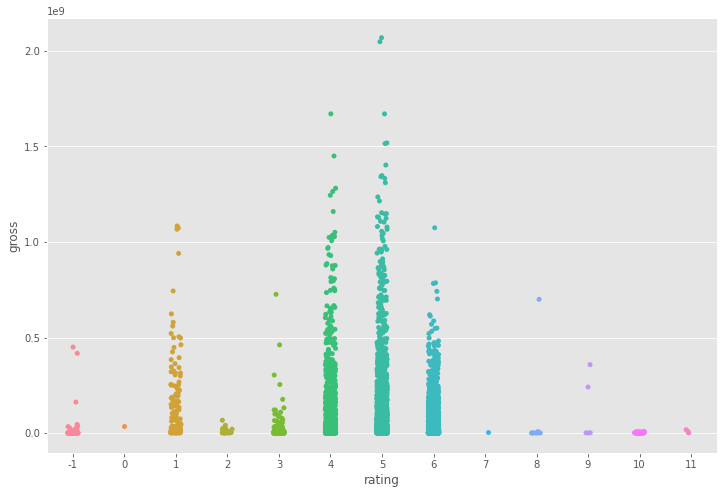

In [49]:
sns.stripplot(x="rating", y="gross", data=movies_df)